In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [197]:
data = pd.read_csv('train.csv')

# Convert pandas dataframe to numpy array
data = np.array(data)

# get rows and cols
m, n = data.shape

#shuffle data
#np.random.shuffle(data)

# divide data into dev and train sets

# transpose the data, flip data such that rows become cols and vice versa
data_dev = data[0:1000]
data_dev = data_dev.T

# arary of array of the labels of each image
Y_dev = data_dev[0]

# arrays of arrays of pixel values
X_dev = data_dev[1:n]

# normalize and scale pixel values between 0 and 1
X_dev = X_dev / 255.

# do the same with training data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [198]:
def init_params():
    # first layer of weights
    # W1 is an array of shape [10, 784]
    # of random numbers from 0 to 1, 
    # then subtract .5 from all of them to center at 0.
    W1 = np.random.rand(10, 784) - 0.5

    # b1 is the vias vector for the first layer
    # 10 elements, one for each neuron
    # also centered around 0
    b1 = np.random.rand(10, 1) - 0.5

    # second layer of weights and biases
    # W2 is an array of shape [10, 1]
    # each of the 10 nodes in the previous layer
    # connect to 10 output nodes.
    W2 = np.random.rand(10, 10) - 0.5

    # b2 is the bias vector for the second layer
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

# define ReLU activation function, introduces 
# non linearity to the data. call this on the first hidden layer
def ReLU(Z):
    return np.maximum(Z, 0)

# softmax converts raw score logits into probabilities by
# taking gthe exponential of each output and then normalizing
# these values by dividing by the sum of all exponentials.
# this makes all output values in the range (0, 1) so they are
# interpretable as probabilities
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):

    # linear combination of inputs and weights for the first
    # layer. holds pre-activation values for first layer
    Z1 = W1.dot(X) + b1

    # apply the ReLU activation function to pre-activation values
    A1 = ReLU(Z1)

    # linear combination of outputs from A1 and weights and biases.
    Z2 = W2.dot(A1) + b2

    # apply softmax to convert logits into probabilities
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

# one hot takes in an array of labels and converts it into
# a one-hot encoded format. this is useful for training
# classification models because it delineates which output
# neuron should be activated for each class.
def one_hot(Y):
    # create matrix of zeros of shape [# of labels, max label + 1]
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))

    # sets value of 1 in each row corresponding to class index
    one_hot_Y[np.arange(Y.size), Y] = 1

    # transpose to make each column repersent a sample
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# backward propagation is used to compute the gradient of the
# loss function w/ respect to each weight and bias. 
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [199]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    predictions = get_predictions(A2)
    print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [200]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

0.8252926829268292


In [215]:
#now lets use this MLP!

import numpy as np
import pandas as pd
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path):
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    # Resize image to 28x28 pixels
    image = image.resize((28, 28))
    # Convert image to numpy array and flatten it to a vector
    image_array = np.array(image).flatten()
    # Normalize pixel values between 0 and 1
    image_array = image_array / 255.0
    # Reshape to match input shape of neural network
    image_array = image_array.reshape(-1, 1)
    print(image_array)
    return image_array

def plot_probabilities(A2):
    plt.figure(figsize=(8, 6))
    plt.bar(range(10), A2.flatten(), color='blue', alpha=0.7)
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities')
    plt.xticks(range(10))
    plt.ylim(0, 1)
    plt.show()

image_path = 'to_classify.png'
_, _, _, A2 = forward_prop(W1, b1, W2, b2, preprocess_image(image_path))
predicted_digit = get_predictions(A2)
print(f'The predicted digit is: {predicted_digit}')

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.0627451 ]
 [0.50196078]
 [0.8745098 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.96862745]
 [0.37647059]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.37647059]
 [0.8745098 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.96862745]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.28235294]
 [0.8745098 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.65

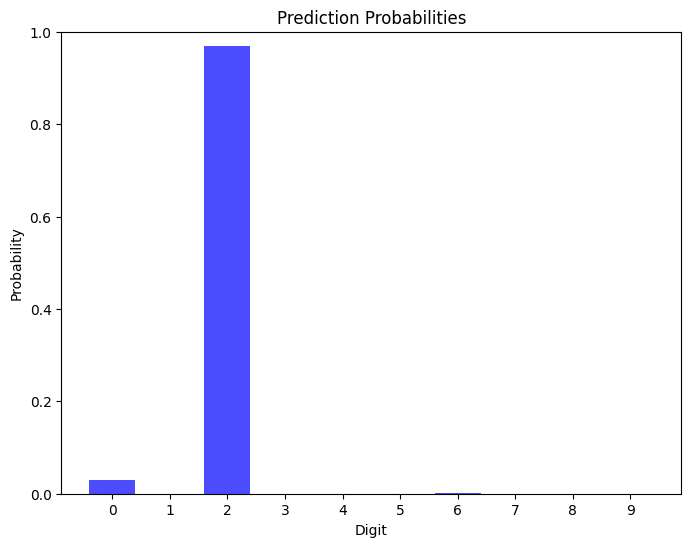

In [216]:
# do forward prorp w/ the weights and biases trained by the network
# only A2 (class probabilities) 
plot_probabilities(A2)